Hypothesis testing using the Welch's t-test is for two independent samples of data. Like Paid and Unpaid posts

So what happens if we want to know the statistical significance for k groups of data?
This is where the analysis of variance technique, or ANOVA is useful.

We'll be looking at SAT scores for five different districts in New York City. 

Specifically, we'll be using "scores.csv" from Kaggle. 

First let's get the assumptions out of the way:

1) The dependent variable (SAT scores) should be continuous.

2) The independent/target variables (districts) should be two or more categorical groups.

3) There must be different participants in each group with no participant being in more than one group.
In our case, each school cannot be in more than one district.

4) The dependent variable (SAT scores) should be approximately normally distributed for each category.

5) Variances of each group are approximately equal.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

data = pd.read_csv("scores.csv")
data.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


In [3]:
data['Borough'].value_counts()

Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: Borough, dtype: int64

In [4]:
data['total_score'] = data['Average Score (SAT Reading)'] +  \
                      data['Average Score (SAT Math)']    +  \
                      data['Average Score (SAT Writing)']

In [5]:
data = data[['Borough', 'total_score']].dropna()

In [6]:
x = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']
district_dict = {}

# Create df with total_score for each district
for district in x:
    district_dict[district] = data[data['Borough'] == district]['total_score']

Brooklyn_std : 154.8684270520867
Bronx_std : 150.39390071890665
Manhattan_std : 230.29413953637814
Queens_std : 195.25289850192115
Staten Island_std : 222.30359621222706


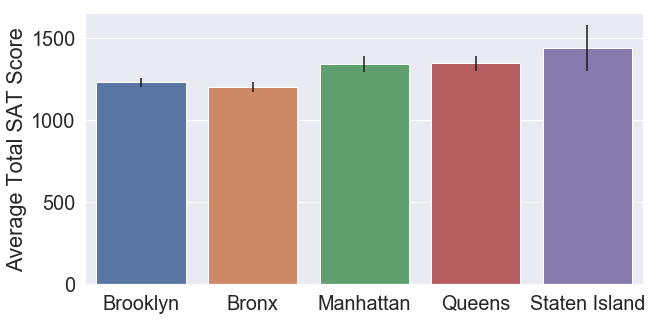

In [7]:
y = []
yerror = []

# Assigns the mean score and 95% confidence limit to each district
for district in x:
    y.append(district_dict[district].mean())
    yerror.append(1.96*district_dict[district].std()/np.sqrt(district_dict[district].shape[0]))    
    print(district + '_std : {}'.format(district_dict[district].std()))

sns.set(font_scale=1.8)
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x, y, yerr=yerror)
ax.set_ylabel('Average Total SAT Score')
plt.show()

NULL HYPOTHESIS: There are no significant differences between the groups' mean SAT scores.

H0:μ1=μ2=μ3=μ4=μ5

ALTERNATE HYPOTHESIS: There is a significant difference between the groups' mean SAT scores.

H1:μi≠μj

In [8]:
from scipy import stats

stats.f_oneway(
    district_dict['Brooklyn'], district_dict['Bronx'], \
    district_dict['Manhattan'], district_dict['Queens'], \
    district_dict['Staten Island']
)

F_onewayResult(statistic=12.733085029201668, pvalue=1.0161974965566023e-09)

The resulting pvalue was less than 0.05. We can reject the null hypothesis 

and conclude that there is a significant difference between the SAT scores for each district. 


Even though we've obtained a very low p-value, we cannot make any assumptions about the magnitude of the effect.

We can calculate the magnitude of the effect to determine how large the difference is. 

One of the measures we can use is Eta-squared.

The general rules of thumb given by Cohen and Miles & Shevlin (2001) for analyzing eta-squared, η2:

Small effect: 0.01
Medium ffect: 0.06
Large effect: 0.14